# Classification FFNN

## load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix 
import seaborn as sns

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

In [3]:
datasets = {}
for i in range(1, 6):
    a = unpickle(f'cifar-10-batches-py/data_batch_{i}')
    datasets[a[b'batch_label']] = a

In [4]:
test_dataset = unpickle('cifar-10-batches-py/test_batch')
X_test = test_dataset[b'data']
y_test = np.array(test_dataset[b'labels'])
print(X_test.shape, y_test.shape)

(10000, 3072) (10000,)


In [ ]:
y_temp = []
for key in datasets.keys():
    temp = {}
    dt = datasets[key][b'labels']
    for i in range(10):
        if temp.get(i) == None:
            temp[i] = dt.count(i)
    print(temp)
    y_temp.extend(dt)
len(y_temp)
for i in range(10):
    print(i, y_temp.count(i))

In [ ]:
X_temp = []
for key in datasets.keys():
    for v in datasets[key][b'data']:
        X_temp.append(v)
X_temp = np.array(X_temp)
X_temp.shape

## model create & learning

In [5]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [22]:
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=3072, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [36]:
model = build_model()

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 206,282
Trainable params: 206,282
Non-trainable params: 0
_________________________________________________________________


In [46]:
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
optimizer = tf.keras.optimizers.Adam(_
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [47]:
historys = []
# for key in datasets.keys():
#     X = datasets[key][b'data']
#     y = np.array(datasets[key][b'labels'])
X = X_temp
y = y_temp
X = X.astype('float32')
X /= 255
y = np_utils.to_categorical(y, 10)
history = model.fit(X, y, batch_size=128,
                    validation_split=0.2,
                    nb_epoch=25, verbose=1)
historys.append(history)

Train on 8000 samples, validate on 2000 samples
Epoch 1/25
8000/8000 [==============================] - 1s 144us/sample - loss: 1.5201 - accuracy: 0.4725 - mse: 0.0672 - val_loss: 1.5105 - val_accuracy: 0.4605 - val_mse: 0.0672
Epoch 2/25
8000/8000 [==============================] - 1s 66us/sample - loss: 1.4287 - accuracy: 0.4955 - mse: 0.0643 - val_loss: 1.5081 - val_accuracy: 0.4675 - val_mse: 0.0672
Epoch 3/25
8000/8000 [==============================] - 1s 66us/sample - loss: 1.3934 - accuracy: 0.5066 - mse: 0.0632 - val_loss: 1.4741 - val_accuracy: 0.4765 - val_mse: 0.0660
Epoch 4/25
8000/8000 [==============================] - 1s 64us/sample - loss: 1.3663 - accuracy: 0.5140 - mse: 0.0623 - val_loss: 1.5019 - val_accuracy: 0.4635 - val_mse: 0.0670
Epoch 5/25
8000/8000 [==============================] - 1s 68us/sample - loss: 1.3400 - accuracy: 0.5230 - mse: 0.0610 - val_loss: 1.5176 - val_accuracy: 0.4725 - val_mse: 0.0673
Epoch 6/25
8000/8000 [==============================] - 

8000/8000 [==============================] - 1s 64us/sample - loss: 1.1975 - accuracy: 0.5779 - mse: 0.0554 - val_loss: 1.5508 - val_accuracy: 0.4630 - val_mse: 0.0678
Epoch 15/25
8000/8000 [==============================] - 1s 68us/sample - loss: 1.1677 - accuracy: 0.5879 - mse: 0.0544 - val_loss: 1.5508 - val_accuracy: 0.4600 - val_mse: 0.0680
Epoch 16/25
8000/8000 [==============================] - 1s 66us/sample - loss: 1.1742 - accuracy: 0.5807 - mse: 0.0547 - val_loss: 1.5551 - val_accuracy: 0.4810 - val_mse: 0.0676
Epoch 17/25
8000/8000 [==============================] - 1s 68us/sample - loss: 1.1509 - accuracy: 0.5962 - mse: 0.0535 - val_loss: 1.5756 - val_accuracy: 0.4695 - val_mse: 0.0683
Epoch 18/25
8000/8000 [==============================] - 0s 61us/sample - loss: 1.1520 - accuracy: 0.5931 - mse: 0.0537 - val_loss: 1.5628 - val_accuracy: 0.4770 - val_mse: 0.0677
Epoch 19/25
8000/8000 [==============================] - 1s 64us/sample - loss: 1.1339 - accuracy: 0.5984 - mse:

In [45]:
historys[0].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

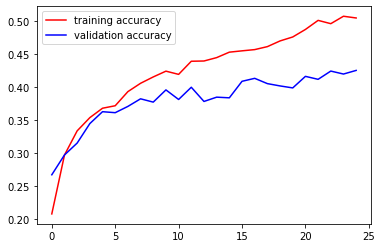

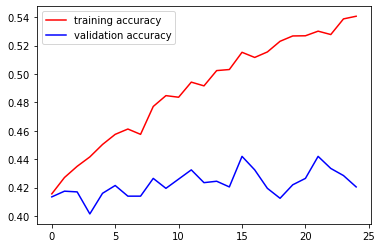

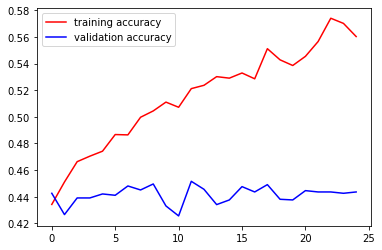

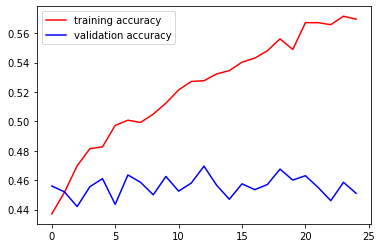

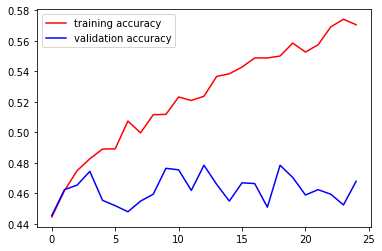

In [43]:
for history in historys:
    plt.plot(history.history['accuracy'],'r')
    plt.plot(history.history['val_accuracy'],'b')
    plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
    plt.show()

## Inference

In [28]:
predictions = model.predict_classes(X_test)

In [29]:
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[307.2640093261719, 0.386]

In [31]:
y_test = np.argmax(Y_test, axis=1)

## Misclassified Images

In [32]:
index = 0
mis = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        mis.append(index)
    index += 1

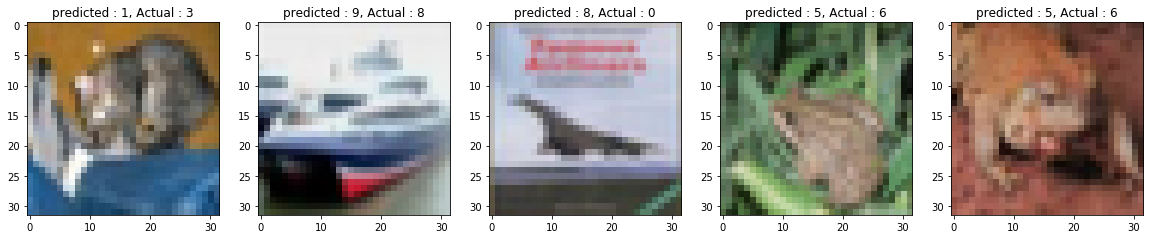

In [33]:
plt.figure(figsize=(20, 4))
for pi, bi in enumerate(mis[:5]):
    plt.subplot(1, 5, pi + 1)
    img = X_test[bi]
    r, g, b = img[0:1024].reshape(32, 32), img[1024:2048].reshape(32, 32), img[2048:].reshape(32, 32)
    im = np.dstack((r, g, b))
    plt.imshow(im)
    plt.title(f"predicted : {predictions[bi]}, Actual : {y_test[bi]}")

## Confusion Matirix

In [34]:
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

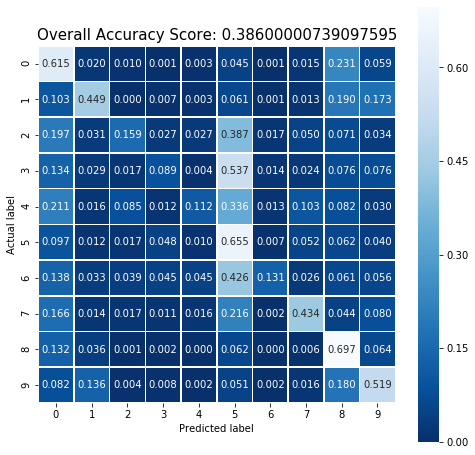

In [35]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score[1])
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();